In [2]:
import pandas as pd

df = pd.read_csv('/content/anime.csv')
df.head()


,anime_id,title,score,rank,popularity,members,synopsis,start_date,end_date,type,episodes,image_url
0,28977,Gintama°,9.05,8,347,680037,"Gintoki, Shinpachi, and Kagura return as the f...",2015-01-01,2016-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/3/720...
1,57555,Chainsaw Man Movie: Reze-hen,9.18,2,962,282129,Sequel to Chainsaw Man .,2025-01-01,2025-01-01,Movie,1.0,https://cdn.myanimelist.net/images/anime/1763/...
2,11061,Hunter x Hunter (2011),9.03,9,8,3107455,Hunters devote themselves to accomplishing haz...,2011-01-01,2014-01-01,TV,148.0,https://cdn.myanimelist.net/images/anime/1337/...
3,52991,Sousou no Frieren,9.29,1,121,1269074,During their decade-long quest to defeat the D...,2023-01-01,2024-01-01,TV,28.0,https://cdn.myanimelist.net/images/anime/1015/...
4,9969,Gintama',9.02,11,406,601940,"After a one-year hiatus, Shinpachi Shimura ret...",2011-01-01,2012-01-01,TV,51.0,https://cdn.myanimelist.net/images/anime/4/503...


In [3]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())


Shape: (10000, 12)

Columns:
 ['anime_id', 'title', 'score', 'rank', 'popularity', 'members', 'synopsis', 'start_date', 'end_date', 'type', 'episodes', 'image_url']


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    10000 non-null  int64  
 1   title       10000 non-null  object 
 2   score       10000 non-null  float64
 3   rank        10000 non-null  int64  
 4   popularity  10000 non-null  int64  
 5   members     10000 non-null  int64  
 6   synopsis    9998 non-null   object 
 7   start_date  9998 non-null   object 
 8   end_date    9916 non-null   object 
 9   type        10000 non-null  object 
 10  episodes    9952 non-null   float64
 11  image_url   10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [5]:
missing = df.isna().mean() * 100
print(missing.sort_values(ascending=False))


end_date      0.84
episodes      0.48
synopsis      0.02
start_date    0.02
rank          0.00
score         0.00
title         0.00
anime_id      0.00
popularity    0.00
members       0.00
type          0.00
image_url     0.00
dtype: float64


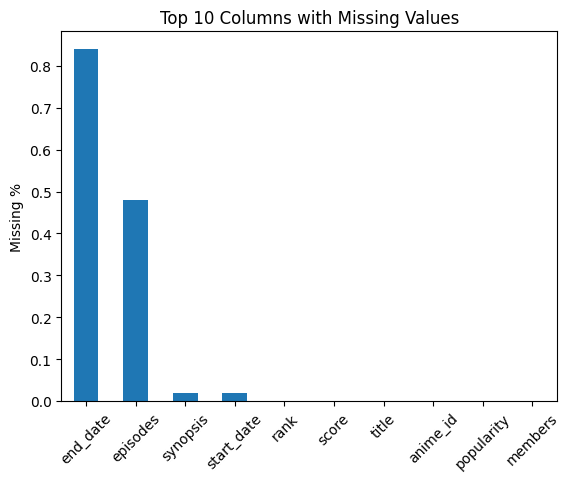

In [6]:
import matplotlib.pyplot as plt

missing.sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Columns with Missing Values")
plt.ylabel("Missing %")
plt.xticks(rotation=45)
plt.show()


In [7]:
df.describe()


,anime_id,score,rank,popularity,members,episodes
count,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,9952.000000
mean,24129.128000,6.980589,5000.494000,6490.903700,1.075309e+05,15.702271
std,19948.188153,0.619406,2886.898727,4646.309341,2.733514e+05,41.865696
min,1.000000,6.050000,1.000000,1.000000,2.260000e+02,1.000000
25%,4055.500000,6.470000,2500.750000,2591.750000,4.270250e+03,1.000000
50%,21406.000000,6.900000,5000.500000,5564.500000,1.817900e+04,11.000000
75%,40028.750000,7.390000,7500.250000,9824.250000,8.469275e+04,13.000000
max,62863.000000,9.290000,10000.000000,22184.000000,4.262220e+06,1787.000000


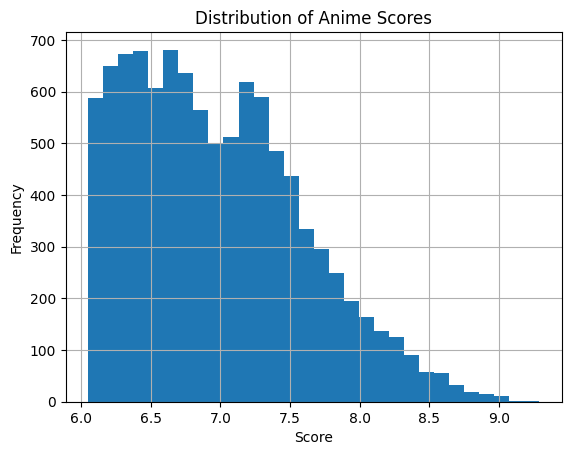

In [8]:
plt.figure()
df['score'].dropna().hist(bins=30)
plt.title("Distribution of Anime Scores")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()


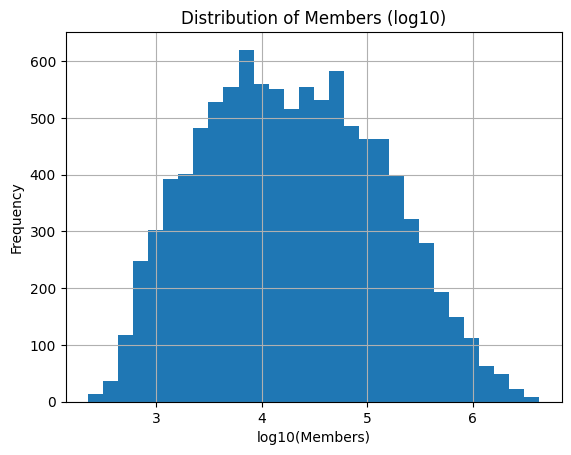

In [9]:
import numpy as np

plt.figure()
np.log10(df['members']).hist(bins=30)
plt.title("Distribution of Members (log10)")
plt.xlabel("log10(Members)")
plt.ylabel("Frequency")
plt.show()


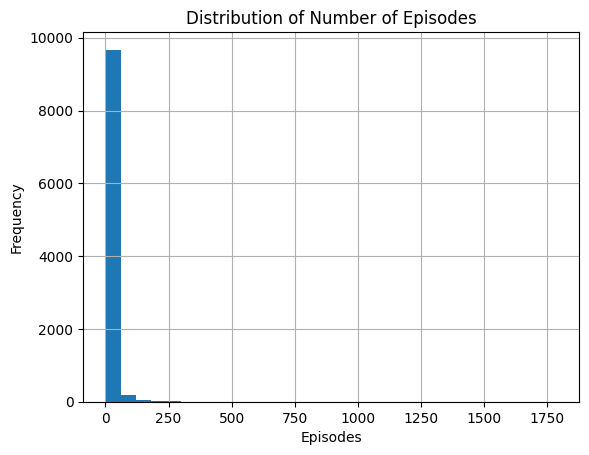

In [10]:
plt.figure()
df['episodes'].dropna().hist(bins=30)
plt.title("Distribution of Number of Episodes")
plt.xlabel("Episodes")
plt.ylabel("Frequency")
plt.show()


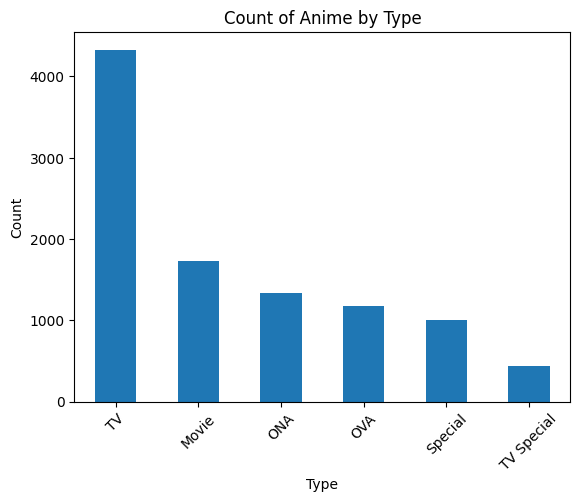

In [11]:
plt.figure()
df['type'].value_counts().plot(kind='bar')
plt.title("Count of Anime by Type")
plt.xlabel("Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


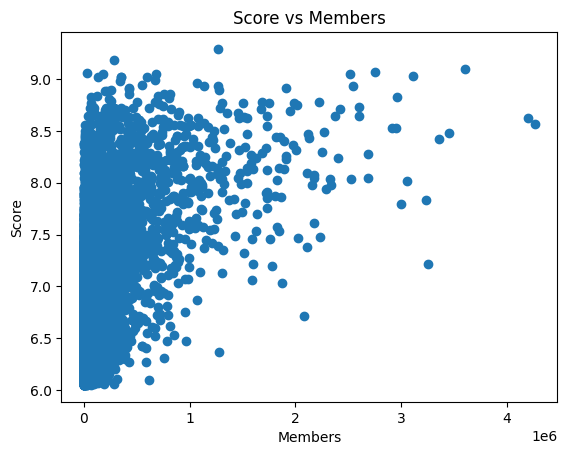

In [12]:
plt.figure()
plt.scatter(df['members'], df['score'])
plt.title("Score vs Members")
plt.xlabel("Members")
plt.ylabel("Score")
plt.show()


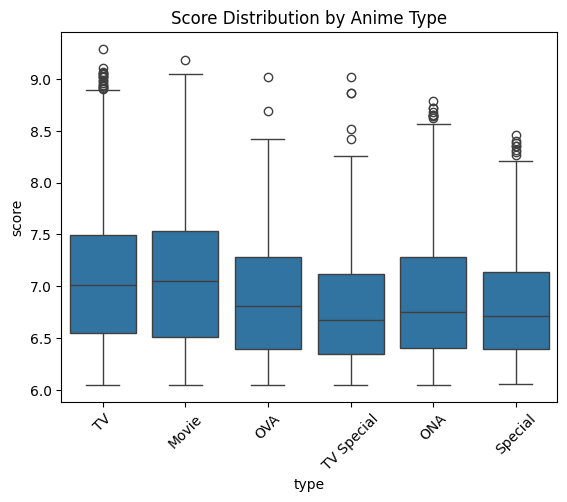

In [13]:
import seaborn as sns

plt.figure()
sns.boxplot(x='type', y='score', data=df)
plt.xticks(rotation=45)
plt.title("Score Distribution by Anime Type")
plt.show()


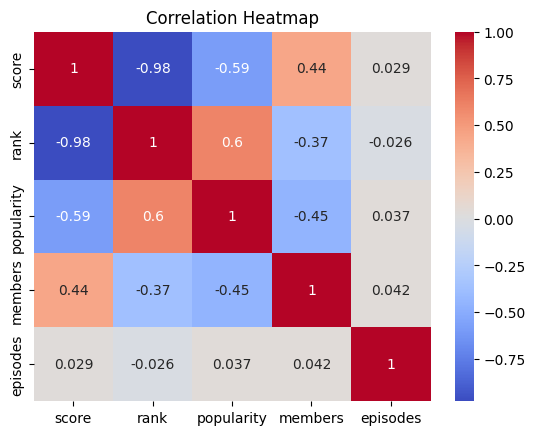

In [14]:
import seaborn as sns

numeric_cols = ['score','rank','popularity','members','episodes']
corr = df[numeric_cols].corr()

plt.figure()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [15]:
top10 = df.sort_values(by='members', ascending=False).head(10)
top10[['title','members','score','type']]


,title,members,score,type
108,Shingeki no Kyojin,4262220,8.57,TV
97,Death Note,4202843,8.62,TV
10,Fullmetal Alchemist: Brotherhood,3602700,9.10,TV
153,One Punch Man,3455995,8.48,TV
200,Kimetsu no Yaiba,3356703,8.42,TV
3350,Sword Art Online,3249073,7.22,TV
1023,Boku no Hero Academia,3236189,7.83,TV
2,Hunter x Hunter (2011),3107455,9.03,TV
660,Naruto,3055340,8.02,TV
1114,Tokyo Ghoul,3002661,7.79,TV
